<a href="https://colab.research.google.com/github/JeffTII/Ai-Non-Ai-Classification/blob/main/ai_non_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Creating a machine learning model that will be able to detect ai or non-ai photos

Importing necessary packages and files

In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from google.colab import files

Uploading a zip file with the images

In [3]:
uploaded = files.upload()

zip_filename = 'ai-project.zip'

# Unzip the uploaded file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Saving ai-project.zip to ai-project.zip


Opening the zip file, and contains a function that will delete the non-images in the image folder

In [4]:

base_dir = '/content/ai-project'

source_path_ai = os.path.join(base_dir, 'ai')
source_path_non_ai = os.path.join(base_dir, 'non-ai')

# Function that will delete the non-image files
def delete_non_image_files(directory):
    for filename in os.listdir(directory):
        if not (filename.lower().endswith(".jpg") or filename.lower().endswith(".jpeg") or filename.lower().endswith(".png")):
            file_path = os.path.join(directory, filename)
            if os.path.isfile(file_path):
                os.remove(file_path)

# Delete non-image files in the source directories
delete_non_image_files(source_path_ai)
delete_non_image_files(source_path_non_ai)

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_ai))} images of AI.")
print(f"There are {len(os.listdir(source_path_non_ai))} images of non-AI.")


There are 252 images of AI.
There are 224 images of non-AI.


Splitting the images into training and validation folders

In [5]:
base_dir = '/content/ai-project'

ai_dir = os.path.join(base_dir, 'ai')
non_ai_dir = os.path.join(base_dir, 'non-ai')

training_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

training_ai_dir = os.path.join(training_dir, 'ai')
training_non_ai_dir = os.path.join(training_dir, 'non-ai')

validation_ai_dir = os.path.join(validation_dir, 'ai')
validation_non_ai_dir = os.path.join(validation_dir, 'non-ai')

# Create directories if they do not exist
os.makedirs(training_ai_dir, exist_ok=True)
os.makedirs(training_non_ai_dir, exist_ok=True)
os.makedirs(validation_ai_dir, exist_ok=True)
os.makedirs(validation_non_ai_dir, exist_ok=True)

print(f"AI Directory: {ai_dir}")
print(f"Non-AI Directory: {non_ai_dir}")
print(f"Training AI Directory: {training_ai_dir}")
print(f"Training Non-AI Directory: {training_non_ai_dir}")
print(f"Validation AI Directory: {validation_ai_dir}")
print(f"Validation Non-AI Directory: {validation_non_ai_dir}")

# Check if the directories exist
print(f"Does the AI directory exist? {os.path.exists(ai_dir)}")

print(f"Does the Non-AI directory exist? {os.path.exists(non_ai_dir)}")

AI Directory: /content/ai-project/ai
Non-AI Directory: /content/ai-project/non-ai
Training AI Directory: /content/ai-project/training/ai
Training Non-AI Directory: /content/ai-project/training/non-ai
Validation AI Directory: /content/ai-project/validation/ai
Validation Non-AI Directory: /content/ai-project/validation/non-ai
Does the AI directory exist? True
Does the Non-AI directory exist? True


Check if the directory is empty and removes empty directories

In [6]:
for dir_path in [training_ai_dir, training_non_ai_dir, validation_ai_dir, validation_non_ai_dir]:
    if len(os.listdir(dir_path)) > 0:
        for file in os.scandir(dir_path):
            os.remove(file.path)

Splitting and shuffling the images

In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    files = [f for f in os.listdir(SOURCE_DIR) if os.path.isfile(os.path.join(SOURCE_DIR, f))]

    non_zero_files = [file for file in files if os.path.getsize(os.path.join(SOURCE_DIR, file)) > 0]

    random.shuffle(non_zero_files)

    split_idx = int(len(non_zero_files) * SPLIT_SIZE)

    train_files = non_zero_files[:split_idx]
    val_files = non_zero_files[split_idx:]

    for file in train_files:
        copyfile(os.path.join(SOURCE_DIR, file), os.path.join(TRAINING_DIR, file))

    for file in val_files:
        copyfile(os.path.join(SOURCE_DIR, file), os.path.join(VALIDATION_DIR, file))

    print(f"Total files: {len(files)}")
    print(f"Non-zero length files: {len(non_zero_files)}")
    print(f"Training files: {len(train_files)}")
    print(f"Validation files: {len(val_files)}")

Runs the the code above, and outputs the results

In [8]:
SPLIT_SIZE = 0.8

# Split the data
split_data(ai_dir, training_ai_dir, validation_ai_dir, SPLIT_SIZE)
split_data(non_ai_dir, training_non_ai_dir, validation_non_ai_dir, SPLIT_SIZE)

# Training and validation splits
print(f"There are {len(os.listdir(training_ai_dir))} images of AI for training")
print(f"There are {len(os.listdir(training_non_ai_dir))} images of non-AI for training")

print(f"There are {len(os.listdir(validation_ai_dir))} images of AI for validation")
print(f"There are {len(os.listdir(validation_non_ai_dir))} images of non-AI for validation")

Total files: 252
Non-zero length files: 252
Training files: 201
Validation files: 51
Total files: 224
Non-zero length files: 224
Training files: 179
Validation files: 45
There are 201 images of AI for training
There are 179 images of non-AI for training
There are 51 images of AI for validation
There are 45 images of non-AI for validation


Creating the image training and validation generators

In [9]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(
      #augmentation
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      target_size=(150, 150))


  validation_datagen = ImageDataGenerator(rescale=1./255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(150, 150))

  return train_generator, validation_generator

In [10]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 380 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


Importing the necessary packages

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#Using data transfer for this model, since I didn't have enough pictures in the folders

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/24 [==============================] - 13s 311ms/step - loss: 1.1277 - accuracy: 0.6395 - val_loss: 0.5145 - val_accuracy: 0.7812
Epoch 2/20
24/24 [==============================] - 6s 256ms/step - loss: 0.6579 - accuracy: 0.7184 - val_loss: 0.4767 - val_accuracy: 0.7708
Epoch 3/20
24/24 [==============================] - 6s 261ms/step - loss: 0.5296 - accuracy: 0.7737 - val_loss: 0.6711 - val_accuracy: 0.7708
Epoch 4/20
24/24 [==============================] - 6s 243ms/step - loss: 0.6189 - accuracy: 0.7342 - val_loss: 0.4939 - val_accuracy: 0.7708
Epoch 5/20
24/24 [==============================] - 6s 243ms/step - loss: 0.4285 - accuracy: 0.7921 - val_loss: 0.4294 - val_accuracy: 0.7500
Epoch 6/20
24/24 [==============================] - 6s 247ms/step - loss: 0.4233 - accuracy: 0.8184 - val_loss: 0.4239 - val_accuracy: 0.7604
Epoch 7/20
24/24 [==============================] - 6s 255ms/step - loss: 0.4026 - accuracy: 0.8105 - val_loss: 0.4142 - val_accuracy: 0.7708
Epoch 8/20
24/24

Commenting out the code below, until I scrape more photos.

In [ ]:
'''
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3), activation='relu',
                              input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid'),

  ])



  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])


  return model'''

"\ndef create_model():\n\n  model = tf.keras.models.Sequential([\n      tf.keras.layers.Conv2D(16,(3,3), activation='relu',\n                              input_shape=(150,150,3)),\n      tf.keras.layers.MaxPooling2D(2,2),\n      tf.keras.layers.Conv2D(32,(3,3), activation='relu'),\n      tf.keras.layers.MaxPooling2D(2,2),\n      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),\n      tf.keras.layers.MaxPooling2D(2,2),\n      tf.keras.layers.Flatten(),\n      tf.keras.layers.Dense(512, activation='relu'),\n      tf.keras.layers.Dense(1, activation='sigmoid'),\n\n  ])\n\n\n\n  model.compile(optimizer='adam',\n                loss='binary_crossentropy',\n                metrics=['accuracy'])\n\n\n  return model"

In [ ]:

'''model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)'''

'model = create_model()\n\nhistory = model.fit(train_generator,\n                    epochs=15,\n                    verbose=1,\n                    validation_data=validation_generator)'

Plotting training vs validation accuracy and loss

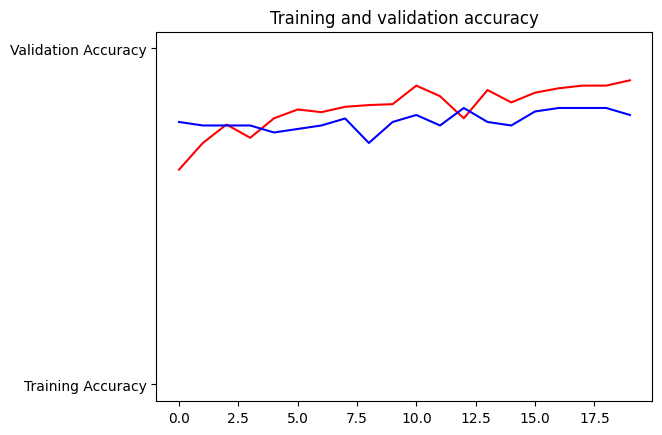

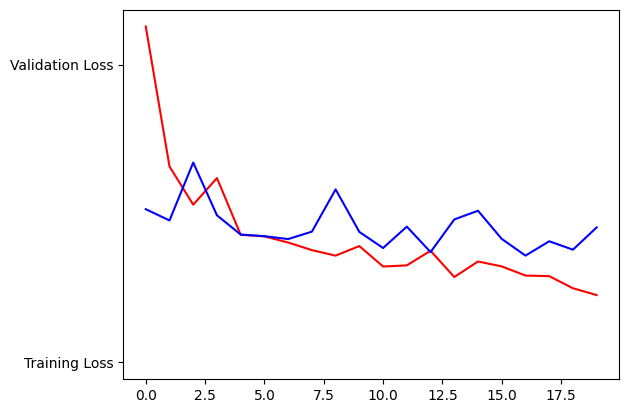

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

Code that allows the user to upload a photo and then classify it as AI or non-AI

In [14]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a picture of an AI")
  else:
    print(fn + " is not a picture of an AI")

Saving ai_image_864332_23319659.png to ai_image_864332_23319659.png
1/1 [==============================] - 1s 1s/step
[1.]
ai_image_864332_23319659.png is a picture of an AI
